In [37]:
!pip install scikit-learn

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils.multiclass import check_classification_targets

In [39]:
# Load the dataset
df = pd.read_csv('property.csv')

# Preprocess the dataset
# Drop irrelevant columns
df = df.drop(columns=['item_id', 'district_uuid'])

# Handle missing values
df = df.dropna()

In [40]:
df

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,1.0,42,False,3.0,0.0,True,23.0
2,50400000.0,1440000,1.0,74,False,2.0,0.0,True,19.0
7,25200000.0,1800000,1.0,68,False,3.0,2.0,True,18.0
8,21600000.0,1440000,1.0,68,False,2.0,2.0,False,27.0
9,86400000.0,0,1.0,42,True,4.0,1.0,True,0.0
...,...,...,...,...,...,...,...,...,...
4921,57600000.0,2592000,2.0,68,True,4.0,2.0,False,3.0
4922,108000000.0,3528000,2.0,100,True,5.0,3.0,True,12.0
4923,136800000.0,0,1.0,79,True,6.0,1.0,True,3.0
4928,86400000.0,0,2.0,63,False,4.0,4.0,False,15.0


In [41]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['has_storage_area'])
y = df['has_storage_area']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print(y_train.dtypes)  # Check the data type of the target variable
print(y_train.unique())  # Check unique values of the target variable
print(y_train.isnull().sum())  # Check for missing values in the target variable

object
[False True]
0


In [43]:
print(y_train.value_counts())

True     1671
False     942
Name: has_storage_area, dtype: int64


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [45]:
# Apply SMOTE to generate synthetic data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [47]:
# Train a classification model (e.g., Logistic Regression)
clf_model = LogisticRegression()
clf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf_model.predict(X_test)

y_test_numeric = y_test.astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_numeric, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.10      0.16       230
           1       0.65      0.89      0.75       424

    accuracy                           0.62       654
   macro avg       0.50      0.50      0.46       654
weighted avg       0.54      0.62      0.54       654



In [52]:
# Create a DataFrame for resampled data
resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
resampled_df['has_elevator'] = y_train_resampled

# Check the first few rows of the resampled DataFrame
resampled_df.head()

,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,property_age
0,180000000.0,0,2.0,95,0,4.0,3.0,20.0
1,43200000.0,1584000,2.0,65,0,4.0,0.0,9.0
2,144000000.0,0,1.0,95,0,3.0,2.0,10.0
3,28800000.0,1440000,2.0,66,1,4.0,4.0,13.0
4,39600000.0,0,0.0,42,0,3.0,1.0,14.0


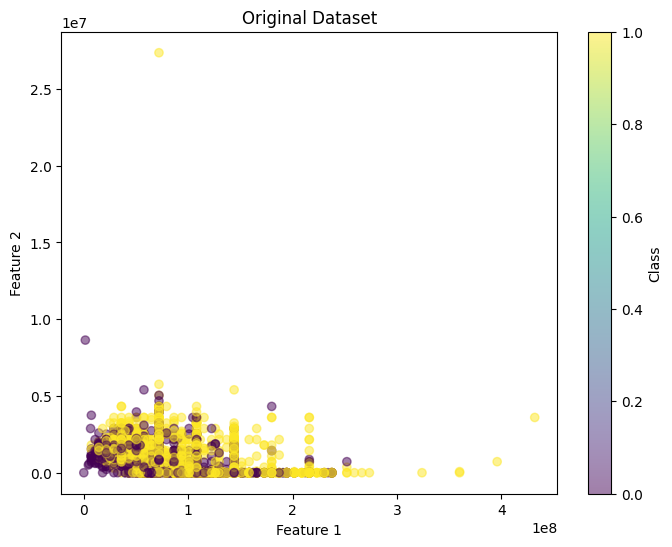

In [48]:
import matplotlib.pyplot as plt

# Plot scatter plot for original dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()


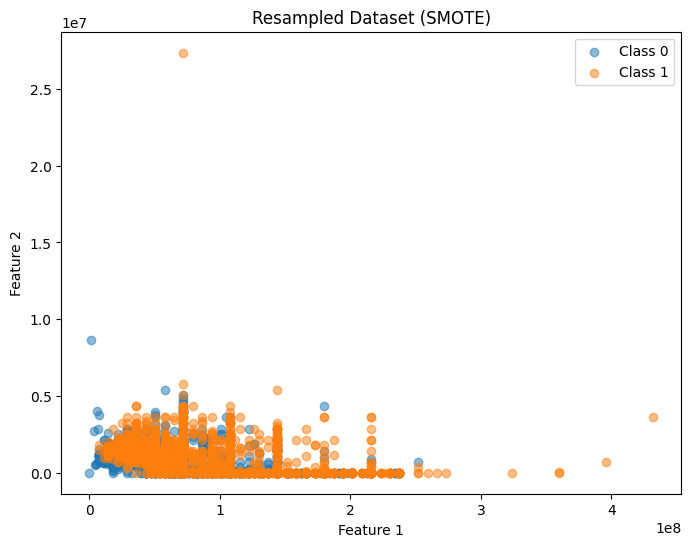

In [49]:
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy arrays
X_train_array = X_train_resampled.to_numpy()
y_train_array = y_train_resampled

# Define a function to create scatter plots
def plot_scatter(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot scatter plot for resampled dataset after SMOTE
plot_scatter(X_train_array, y_train_array, title='Resampled Dataset (SMOTE)')


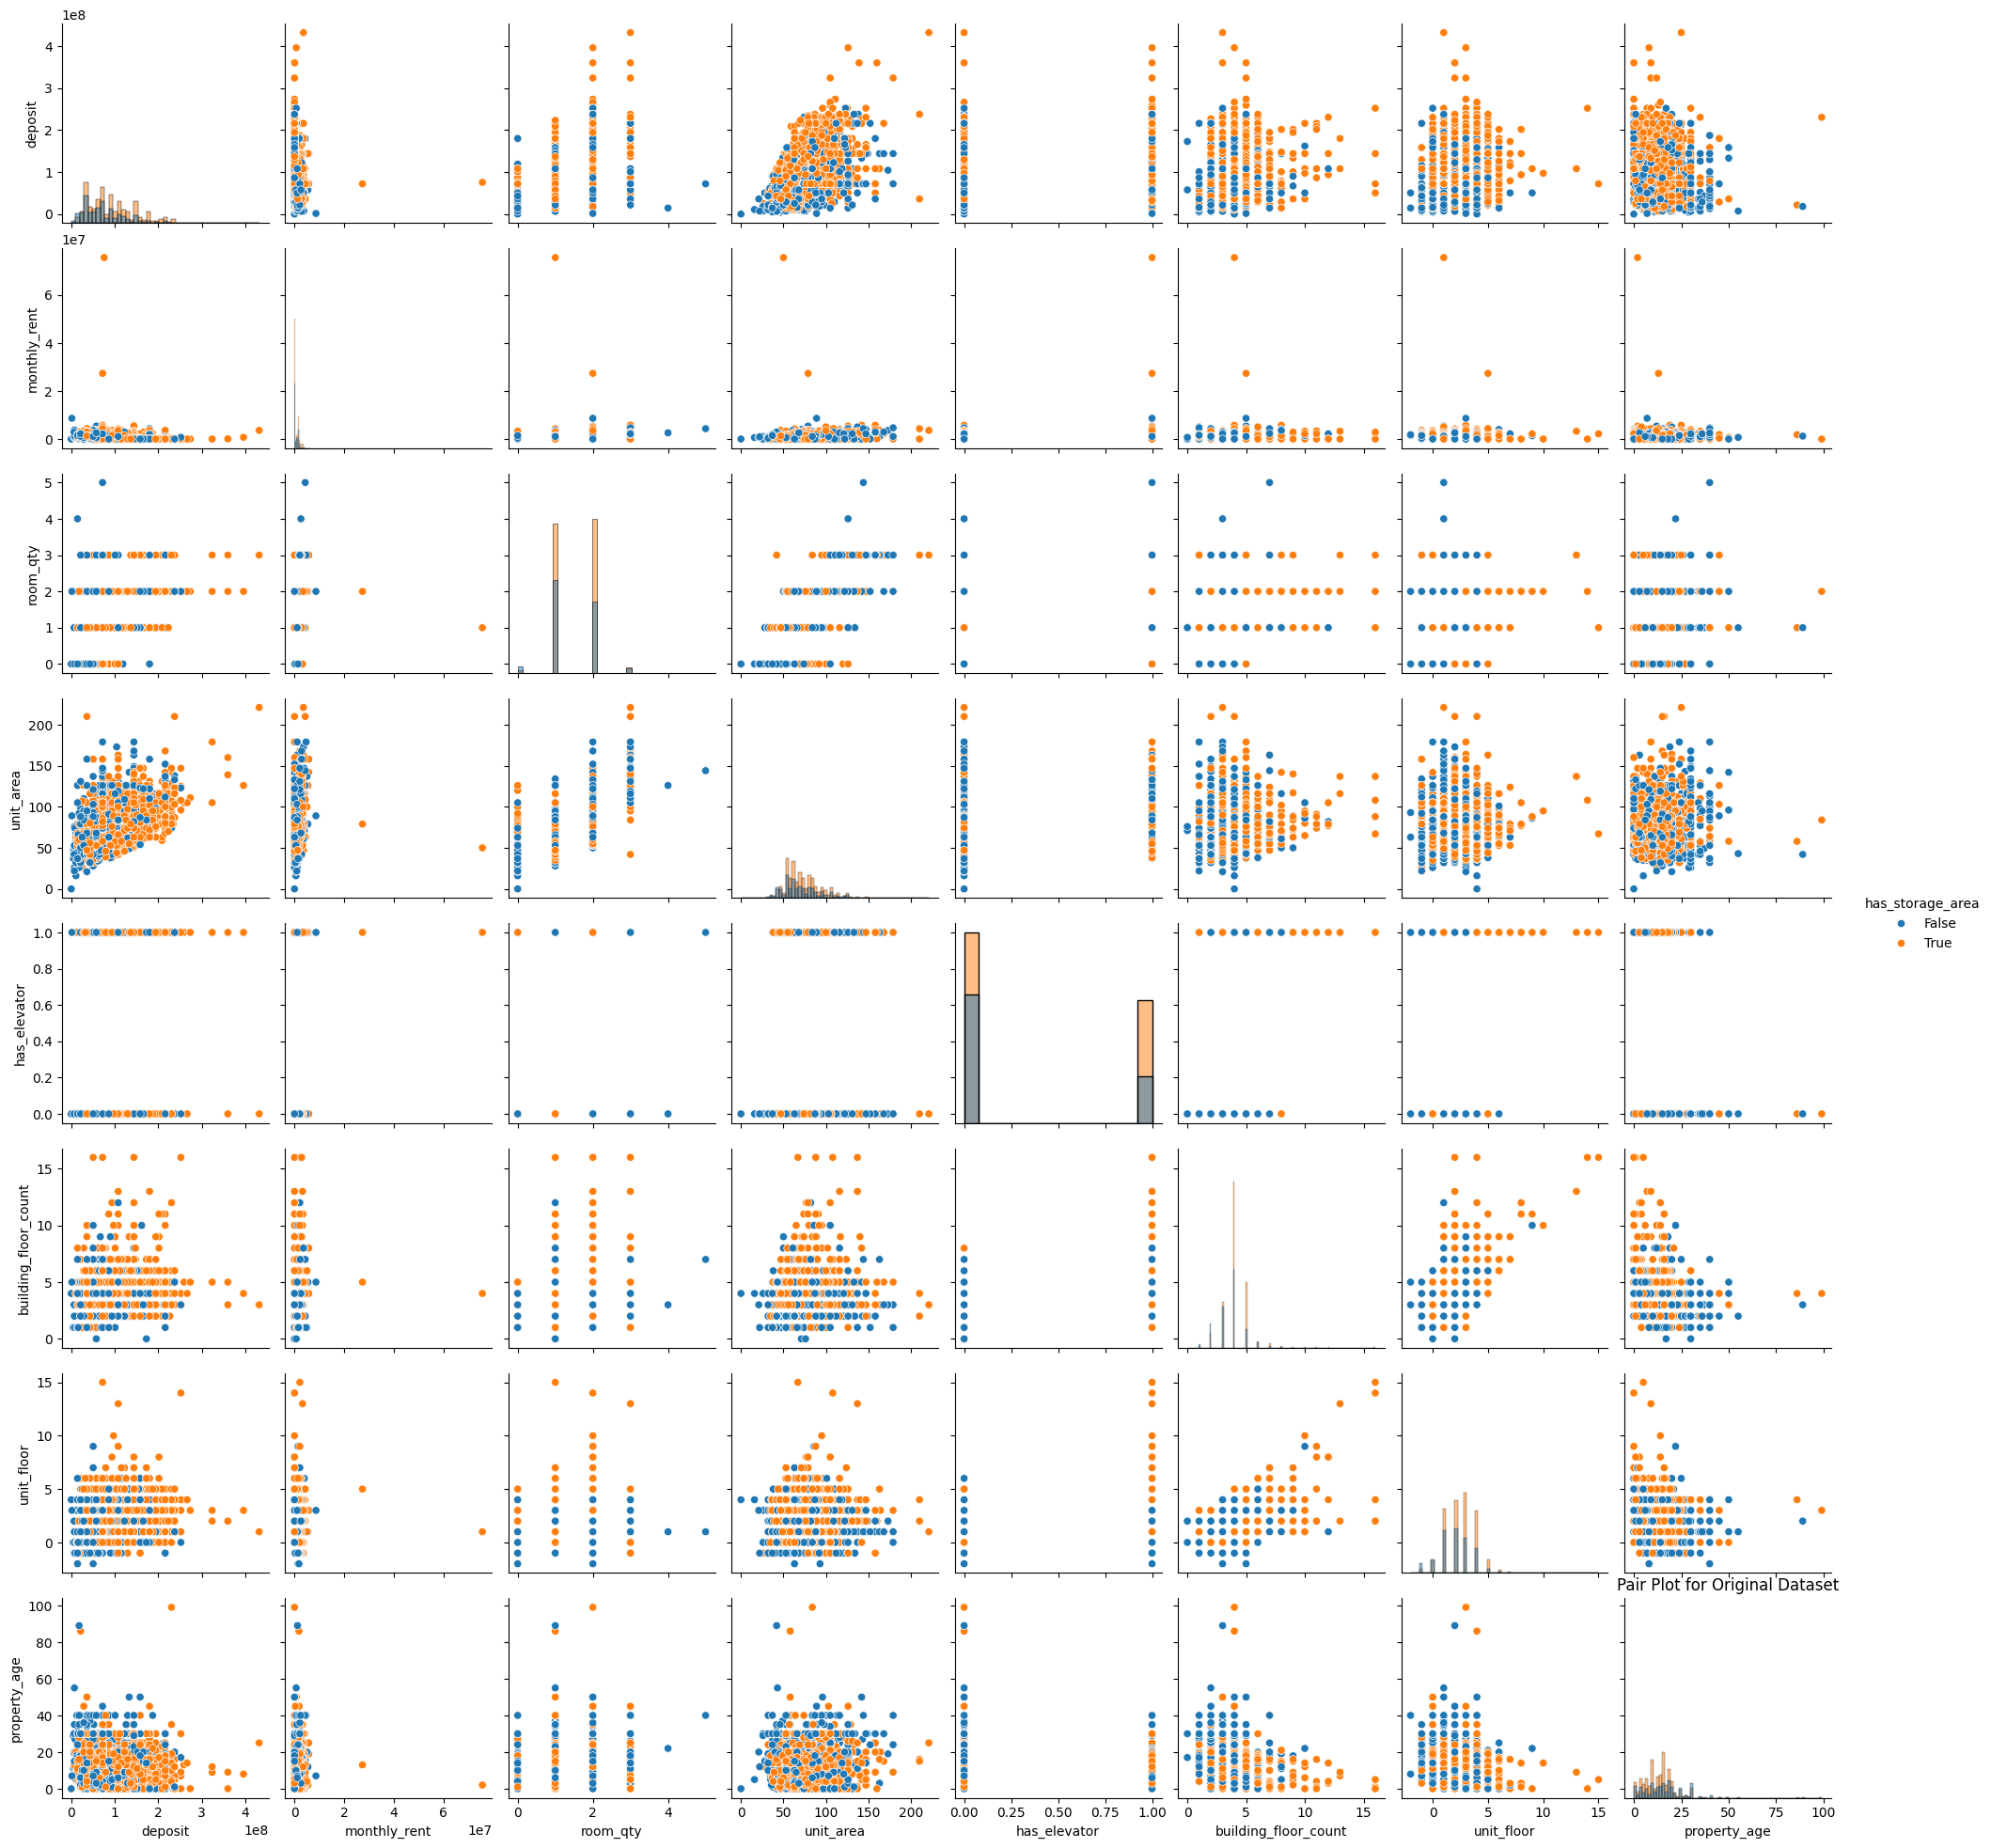

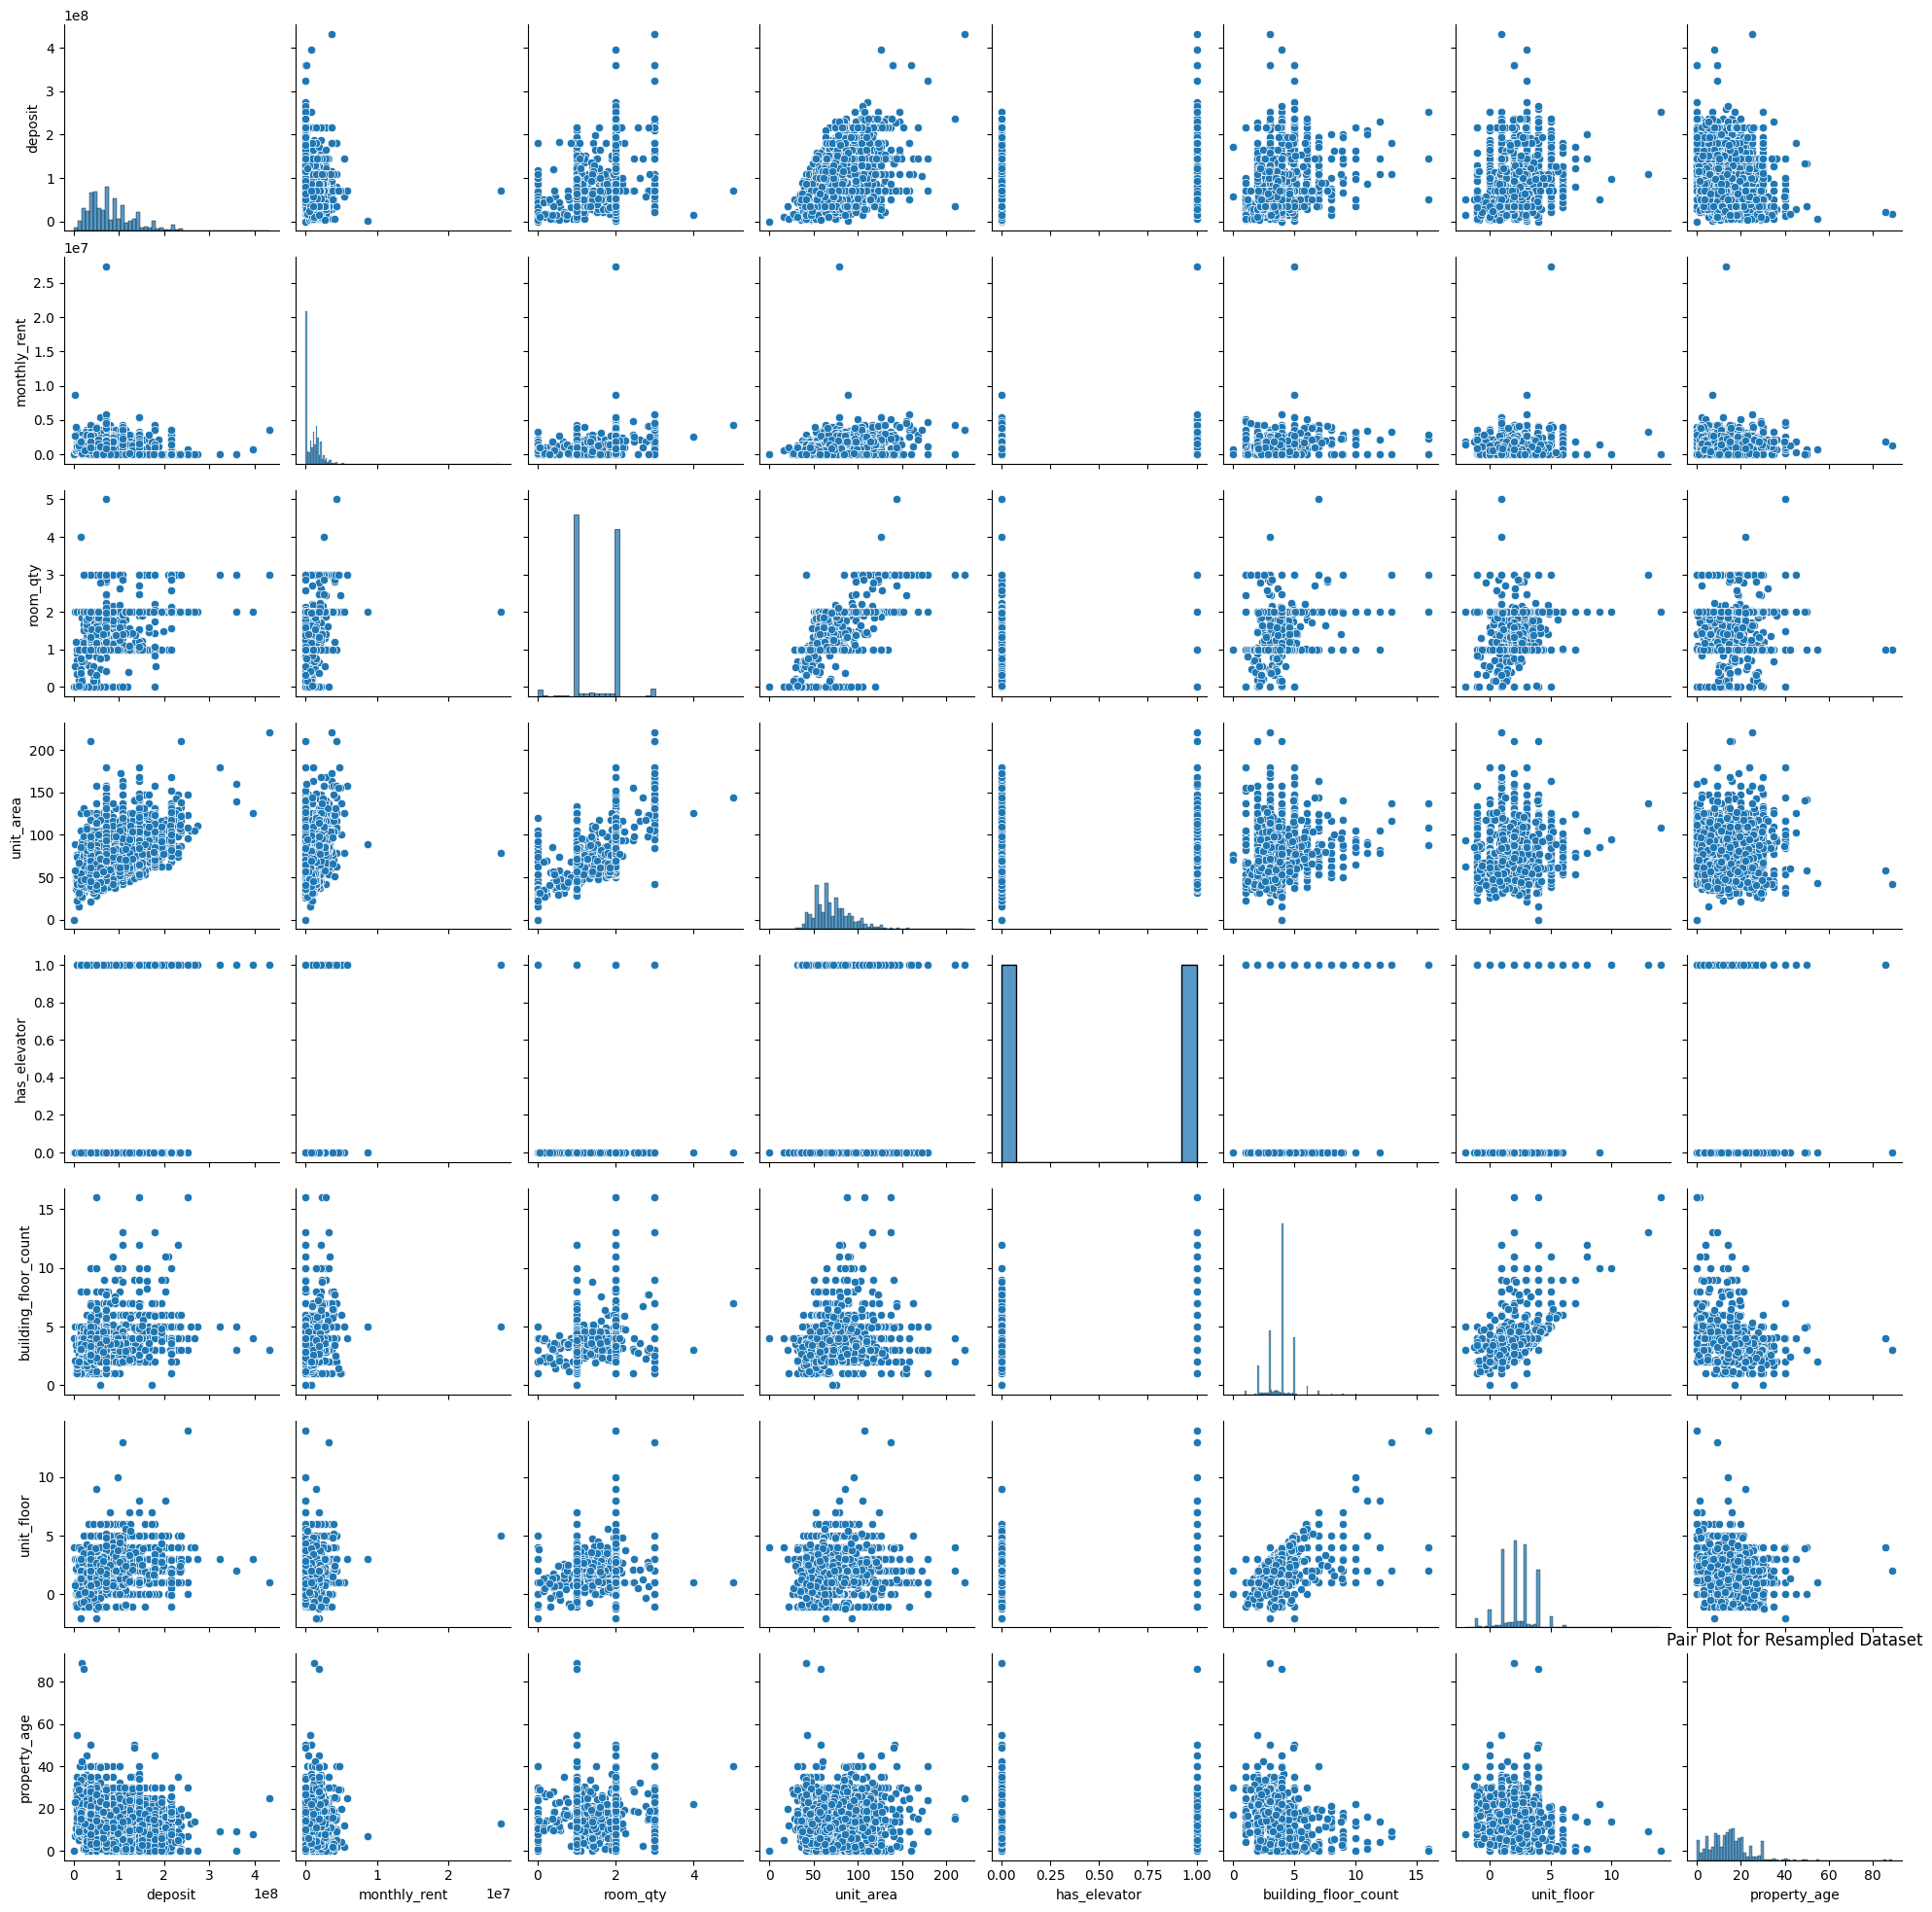

In [54]:
import seaborn as sns

# Plot pair plot for original dataset
sns.pairplot(df, hue='has_storage_area', diag_kind='hist')
plt.title('Pair Plot for Original Dataset')
plt.show()

# Plot pair plot for resampled dataset
sns.pairplot(resampled_df, diag_kind='hist')
plt.title('Pair Plot for Resampled Dataset')
plt.show()